# Checkbox detection using YOLOv11

In this notebook, we prototype an object detection model to tackle the task of checkbox detection in documents.

## Why use machine learning?

Traditional approaches, like those using OpenCV, require extensive parameter tuning and threshold adjustments tailored to specific document templates. While these methods can work for narrowly defined formats, they often generalize poorly.

Learned approached potentially offer a more robust and adaptable solution. The hierarchical nature of CNNs makes them particularly effective at identifying structured patterns, like squares.

## Why use YOLO?
* Open source, easy to use off-the-shelf implementation.
* SotA family of models for object detection.
* Fast.

![model_choices](../docs/markdown_imgs/models.png)

![model_arch](../docs/markdown_imgs/darknet.png)

![backbone](../docs/markdown_imgs/yolo_arch.webp)

## Training data
I annotated a tiny sample of 5 documents similar to original challenge image. The images and the annotations are in the subfolder `../datasets/checkboxes`. Here is an example:

![training_sample](../datasets/checkboxes/train/images/d2.jpg)

## Validation data
The challenge image, unseen during the training process, will be our validation sample.

# Training

In [48]:
from ultralytics import YOLO

In [49]:
# Load a model
model = YOLO("yolo11m.pt")  # load a pretrained model
# Train the model with 4 GPUs
results = model.train(data="../data.yaml", 
                      epochs=100, 
                      imgsz=640, 
                      device=[0, 1, 2, 3],
                      conf=0.5) # Filter out low-confidence boxes

New https://pypi.org/project/ultralytics/8.3.38 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.36 🚀 Python-3.9.20 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                      CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                      CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                      CUDA:3 (NVIDIA GeForce GTX 1080 Ti, 11169MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=../data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1, 2, 3], workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio

100%|██████████| 5.35M/5.35M [00:00<00:00, 107MB/s]


AMP: checks passed ✅


train: Scanning /home/jeremiasrodriguez/yolo/../datasets/checkboxes/train/labels.cache... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<?, ?it/s]
val: Scanning /home/jeremiasrodriguez/yolo/../datasets/checkboxes/val/labels.cache... 1 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1/1 [00:00<?, ?it/s]


Plotting labels to ../runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 24 dataloader workers
Logging results to ../runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.43G      4.627      6.169      1.623         91        640: 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.57it/s]


                   all          1         43          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.44G      2.906      3.387      1.287         37        640: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.39it/s]


                   all          1         43          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.43G       3.26      3.867      1.489         42        640: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.43it/s]


                   all          1         43          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.43G      4.515      4.758      1.704         75        640: 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 40.46it/s]


                   all          1         43          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.45G      4.507      4.241      1.778         80        640: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.10it/s]


                   all          1         43          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.51G      5.842      8.666      1.668        129        640: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.53it/s]


                   all          1         43          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.43G       5.86      6.367      2.421         52        640: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 39.21it/s]


                   all          1         43          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.45G      5.512       6.42      1.875        132        640: 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.20it/s]


                   all          1         43          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       1.5G       6.48      16.09      2.049        139        640: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.30it/s]


                   all          1         43          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.45G      4.884       4.59      1.866        101        640: 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.52it/s]


                   all          1         43          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.43G      4.315      3.642      2.062         58        640: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.41it/s]


                   all          1         43          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.43G      3.689      3.374      1.885         54        640: 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.21it/s]


                   all          1         43          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.45G      3.668      3.327      1.577         94        640: 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.14it/s]


                   all          1         43          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.66G      2.555      2.272      1.077        156        640: 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.41it/s]


                   all          1         43          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.67G      1.916      2.461      0.955         82        640: 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.94it/s]


                   all          1         43      0.449       0.04      0.193      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.65G      1.116     0.9787     0.8419         77        640: 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.89it/s]


                   all          1         43          1      0.168      0.584      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.65G      1.515      1.465     0.8298         50        640: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.69it/s]


                   all          1         43      0.938      0.389      0.672      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.67G      1.262      1.221     0.8307         84        640: 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.96it/s]


                   all          1         43      0.938      0.389      0.672      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.68G      1.288      1.341      0.809         78        640: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.55it/s]


                   all          1         43      0.976      0.428       0.71      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.62G      1.405      1.012     0.8355        110        640: 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.60it/s]


                   all          1         43      0.976      0.428       0.71      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.68G      1.035     0.8359     0.8046         81        640: 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.51it/s]


                   all          1         43      0.923      0.662      0.808       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.64G      1.407      1.056     0.8268        137        640: 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 37.95it/s]


                   all          1         43      0.923      0.662      0.808       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.67G      1.241     0.9295     0.8595         63        640: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 37.21it/s]


                   all          1         43      0.929      0.877      0.924      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.69G      1.513     0.9585     0.7969        220        640: 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.93it/s]


                   all          1         43      0.929      0.877      0.924      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.68G       2.28      1.862     0.9388        138        640: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.42it/s]


                   all          1         43      0.869      0.897      0.932      0.562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.64G      1.403      0.987     0.8217        164        640: 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 37.95it/s]


                   all          1         43      0.869      0.897      0.932      0.562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.69G      1.223     0.8399     0.7536        131        640: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 35.11it/s]


                   all          1         43      0.862      0.813      0.895      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.62G      1.275     0.8093     0.8047        149        640: 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 37.76it/s]


                   all          1         43      0.862      0.813      0.895      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.67G      1.367     0.8934     0.7848         98        640: 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.33it/s]


                   all          1         43      0.956      0.766      0.872      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       1.6G     0.9323     0.7461     0.8524         63        640: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.17it/s]


                   all          1         43      0.956      0.766      0.872      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.69G      1.212     0.7832     0.7734        126        640: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 37.14it/s]


                   all          1         43      0.899      0.869      0.912      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.62G      1.216     0.7257     0.8109        164        640: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.24it/s]


                   all          1         43      0.899      0.869      0.912      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.71G      1.635      1.093     0.8083        146        640: 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 36.87it/s]


                   all          1         43      0.964      0.897      0.923      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.67G     0.9514     0.6303     0.8176         96        640: 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 32.48it/s]


                   all          1         43      0.964      0.897      0.923      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.68G     0.8269     0.5871     0.8246         87        640: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 36.60it/s]


                   all          1         43       0.94      0.897      0.925      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.67G      1.042      0.693     0.7936        103        640: 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.95it/s]


                   all          1         43       0.94      0.897      0.925      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.69G      1.105     0.6826     0.8166        126        640: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 37.85it/s]


                   all          1         43      0.949      0.897      0.929       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.64G      1.027     0.6312     0.7916         48        640: 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 36.14it/s]


                   all          1         43      0.949      0.897      0.929       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.68G      1.026       0.54     0.7548         89        640: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 36.79it/s]


                   all          1         43      0.964      0.841      0.902      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.67G      1.192     0.6528     0.7775        136        640: 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 37.26it/s]


                   all          1         43      0.964      0.841      0.902      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.66G     0.9337     0.5737     0.7665         64        640: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.27it/s]


                   all          1         43      0.938      0.869      0.911      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.64G      1.493     0.9897      0.849        127        640: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 36.06it/s]


                   all          1         43      0.938      0.869      0.911      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.68G      1.036     0.5583     0.8052         89        640: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 36.71it/s]


                   all          1         43      0.945      0.869      0.917      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.64G      1.032     0.5115     0.7593        145        640: 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 35.18it/s]


                   all          1         43      0.945      0.869      0.917      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.68G     0.8055     0.5029     0.7867         72        640: 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.85it/s]


                   all          1         43      0.918      0.897      0.916        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.67G      1.552     0.9996     0.7545         82        640: 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 37.96it/s]


                   all          1         43      0.918      0.897      0.916        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.68G      1.019     0.5943     0.7947         89        640: 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.28it/s]


                   all          1         43      0.968      0.887      0.921      0.593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.63G      0.755     0.6121      0.767         37        640: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 37.89it/s]


                   all          1         43      0.968      0.887      0.921      0.593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.69G      1.028     0.5465     0.7716        165        640: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.36it/s]


                   all          1         43       0.94      0.897      0.921      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.67G     0.9485     0.4825      0.765         93        640: 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.49it/s]


                   all          1         43       0.94      0.897      0.921      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.67G     0.9714     0.6995     0.8188         51        640: 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.66it/s]


                   all          1         43      0.968      0.892      0.921      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.65G      0.924      0.524     0.7597         80        640: 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 37.61it/s]


                   all          1         43      0.968      0.892      0.921      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.66G     0.7593     0.6045     0.7479         33        640: 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 37.85it/s]


                   all          1         43      0.968      0.892      0.921      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.65G       1.54     0.9157     0.8159        207        640: 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.28it/s]


                   all          1         43      0.969      0.897      0.923      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.61G     0.7863     0.4725     0.7633         99        640: 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.39it/s]


                   all          1         43      0.969      0.897      0.923      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.66G      0.839     0.4998     0.7853         75        640: 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.67it/s]


                   all          1         43      0.969      0.897      0.923      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.68G      1.263       1.01     0.8327        106        640: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 35.73it/s]


                   all          1         43      0.968      0.888      0.919      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.65G     0.8181     0.4906     0.8333         69        640: 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 37.01it/s]


                   all          1         43      0.968      0.888      0.919      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.68G      0.976     0.5168     0.7717         82        640: 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 35.47it/s]


                   all          1         43      0.968      0.888      0.919      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.69G     0.8298      0.474     0.7944        107        640: 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.64it/s]


                   all          1         43      0.905      0.952      0.942      0.565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       1.7G      1.049     0.4954     0.7668        171        640: 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.45it/s]


                   all          1         43      0.905      0.952      0.942      0.565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.68G     0.8529     0.4395     0.8326         75        640: 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.33it/s]


                   all          1         43      0.905      0.952      0.942      0.565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.69G      0.819     0.4802     0.8606        146        640: 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.69it/s]


                   all          1         43      0.917      0.952      0.947      0.595

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.67G     0.8917     0.4426     0.7675        116        640: 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.70it/s]


                   all          1         43      0.917      0.952      0.947      0.595

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       1.7G      1.153     0.5718     0.7677        169        640: 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 37.89it/s]


                   all          1         43      0.917      0.952      0.947      0.595

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.68G     0.8162     0.4522      0.782        113        640: 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.56it/s]


                   all          1         43      0.925      0.952      0.955      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.63G      1.304     0.6409     0.7503        187        640: 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.76it/s]


                   all          1         43      0.925      0.952      0.955      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.69G     0.8595     0.4578     0.7514        135        640: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 32.71it/s]


                   all          1         43      0.925      0.952      0.955      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.68G     0.7736     0.4304     0.8013        147        640: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.46it/s]


                   all          1         43      0.938      0.897      0.937      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.65G     0.7336     0.3957      0.812         74        640: 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.23it/s]


                   all          1         43      0.938      0.897      0.937      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.75G     0.8286     0.4481     0.7657        175        640: 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.72it/s]


                   all          1         43      0.938      0.897      0.937      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.67G     0.7635     0.5115     0.8027         51        640: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.28it/s]


                   all          1         43      0.969      0.897      0.942      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.64G       1.17      0.587     0.8498        126        640: 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.38it/s]


                   all          1         43      0.969      0.897      0.942      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.73G     0.8118     0.5038      0.772         67        640: 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.36it/s]


                   all          1         43      0.969      0.897      0.942      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.73G      1.529      0.871      0.755        112        640: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 37.97it/s]


                   all          1         43      0.969      0.897      0.942      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.61G     0.7589     0.4137     0.7544        116        640: 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.53it/s]


                   all          1         43      0.969      0.897      0.942      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.74G     0.7242     0.4681     0.7917        108        640: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.14it/s]


                   all          1         43      0.969      0.897      0.942      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.74G     0.7471     0.4445      0.798         82        640: 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.11it/s]


                   all          1         43      0.962      0.924      0.951      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.64G      1.443     0.6891     0.8181        235        640: 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 37.23it/s]


                   all          1         43      0.962      0.924      0.951      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       1.7G       0.99     0.5665     0.7996        147        640: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.17it/s]


                   all          1         43      0.962      0.924      0.951      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.67G     0.8425     0.5082     0.7729         47        640: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 36.55it/s]


                   all          1         43      0.925      0.952      0.963      0.655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.64G      1.118     0.5374     0.8296        138        640: 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 37.68it/s]


                   all          1         43      0.925      0.952      0.963      0.655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       1.7G     0.8749     0.3954      0.783        169        640: 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 37.97it/s]


                   all          1         43      0.925      0.952      0.963      0.655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.67G     0.8054     0.4854     0.7686         56        640: 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.12it/s]


                   all          1         43      0.947      0.952      0.966      0.664

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.65G     0.7468     0.3944     0.8228         94        640: 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.18it/s]


                   all          1         43      0.947      0.952      0.966      0.664

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.68G     0.8503     0.4275     0.8146        120        640: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 35.63it/s]


                   all          1         43      0.947      0.952      0.966      0.664

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      1.69G      1.097     0.5808      0.812        130        640: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.47it/s]


                   all          1         43      0.947      0.952      0.966      0.664

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.68G     0.7423     0.4364     0.8253        107        640: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.03it/s]


                   all          1         43      0.938      0.952      0.966      0.667

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.62G     0.9967     0.4248      0.803        166        640: 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 37.99it/s]


                   all          1         43      0.938      0.952      0.966      0.667

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.68G     0.7017     0.4204     0.7689         91        640: 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.14it/s]


                   all          1         43      0.938      0.952      0.966      0.667
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      1.67G      1.011     0.8462     0.6617         42        640: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.54it/s]


                   all          1         43      0.938      0.952      0.966      0.667

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.64G     0.8845     0.5165     0.8335         38        640: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 35.17it/s]


                   all          1         43      0.972      0.947      0.968      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.65G     0.8516     0.5056      0.784         38        640: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 30.06it/s]


                   all          1         43      0.972      0.947      0.968      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      1.65G      0.822     0.5755     0.7949         27        640: 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.19it/s]


                   all          1         43      0.972      0.947      0.968      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.67G     0.9454     0.5412     0.8166         42        640: 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.77it/s]


                   all          1         43      0.972      0.947      0.968      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.72G     0.9181     0.5784     0.8573         36        640: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.09it/s]


                   all          1         43      0.972      0.952      0.969      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.59G     0.7709       0.48     0.7743         42        640: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.50it/s]


                   all          1         43      0.972      0.952      0.969      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.67G     0.8306     0.5968     0.7981         33        640: 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.38it/s]


                   all          1         43      0.972      0.952      0.969      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      1.67G       0.91      0.519     0.7706         42        640: 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 37.83it/s]


                   all          1         43      0.972      0.952      0.969      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.67G      1.089     0.6285      0.805         42        640: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.42it/s]


                   all          1         43      0.972      0.952      0.969      0.678

100 epochs completed in 0.026 hours.
Optimizer stripped from ../runs/detect/train/weights/last.pt, 40.5MB
Optimizer stripped from ../runs/detect/train/weights/best.pt, 40.5MB

Validating ../runs/detect/train/weights/best.pt...
Ultralytics 8.3.36 🚀 Python-3.9.20 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                      CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                      CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                      CUDA:3 (NVIDIA GeForce GTX 1080 Ti, 11169MiB)
YOLO11m summary (fused): 303 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.02it/s]


                   all          1         43      0.972      0.952      0.969      0.676
        empty_checkbox          1         25          1       0.96       0.98      0.667
       filled_checkbox          1         18      0.944      0.944      0.958      0.685
Speed: 0.2ms preprocess, 16.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to ../runs/detect/train


# Results

Training succeeded! The training loss quickly dropped to very small values, which means the model has learned to fit the training dataset. The val loss is very close to the training lose, indicating good generalization.

![loss](../runs/detect/train/results.png)


# Validation on the challenge image
During training, the model has not seen the challenge image. Let's see what the predictions look like:

In [50]:
import cv2
challenge_img_path = "../datasets/checkboxes/val/images/real.jpg"
results = model.predict(challenge_img_path, save=True, device=[0], imgsz=640, conf=0.49)


image 1/1 /home/jeremiasrodriguez/yolo/../datasets/checkboxes/val/images/real.jpg: 352x640 24 empty_checkboxs, 17 filled_checkboxs, 12.6ms
Speed: 1.9ms preprocess, 12.6ms inference, 2.1ms postprocess per image at shape (1, 3, 352, 640)
Results saved to ../runs/detect/train2


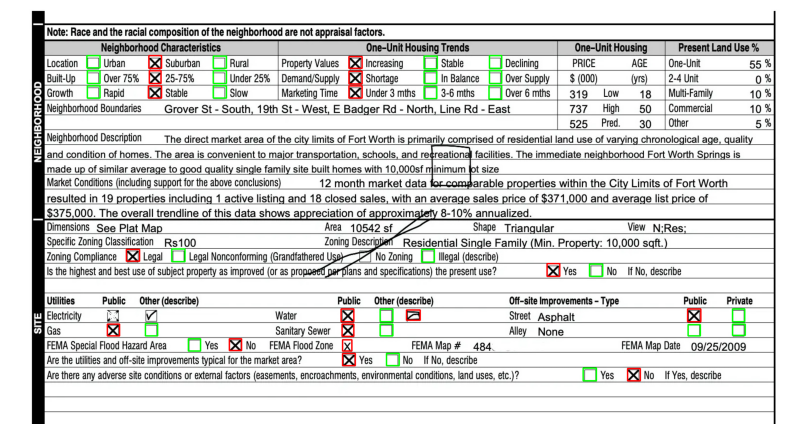

In [51]:
class_colors = {
    0: (0, 255, 0),  # Red for class FILLED CHECKBOX
    1: (255, 0, 0),  # Green for class UNFILLED CHECKBOX
}

image = cv2.imread(challenge_img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Extract bounding boxes
boxes = results[0].boxes.xyxy  # Get bounding box coordinates (x1, y1, x2, y2)
scores = results[0].boxes.conf  # Confidence scores (optional)
class_ids = results[0].boxes.cls  # Class IDs (0, 1, etc.)

for box, cls in zip(boxes, class_ids):
    x1, y1, x2, y2 = map(int, box)  # Convert to integers
    color = class_colors.get(int(cls), (255, 255, 255))  # Default to white if class not found
    cv2.rectangle(image, (x1, y1), (x2, y2), color=color, thickness=2)  # Draw box

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("off")
plt.show()

![scores](../runs/detect/train2/real.jpg)

The previous results are using a scrict filter of confidence > 0.5. If we lower this threshold, we get spurious detections:

In [52]:
results = model.predict(challenge_img_path, save=True, device=[0], imgsz=640, conf=0.2)


image 1/1 /home/jeremiasrodriguez/yolo/../datasets/checkboxes/val/images/real.jpg: 352x640 25 empty_checkboxs, 22 filled_checkboxs, 12.1ms
Speed: 21.2ms preprocess, 12.1ms inference, 1.0ms postprocess per image at shape (1, 3, 352, 640)
Results saved to ../runs/detect/train3


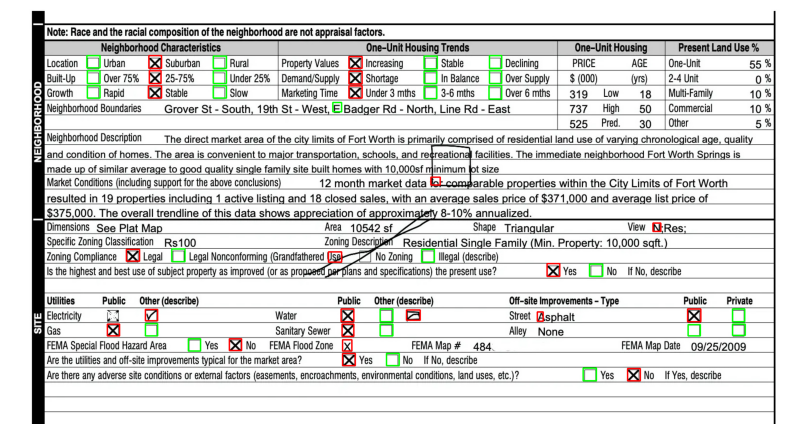

In [53]:
# Extract bounding boxes
boxes = results[0].boxes.xyxy  # Get bounding box coordinates (x1, y1, x2, y2)
scores = results[0].boxes.conf  # Confidence scores (optional)
class_ids = results[0].boxes.cls  # Class IDs (0, 1, etc.)

for box, cls in zip(boxes, class_ids):
    x1, y1, x2, y2 = map(int, box)  # Convert to integers
    color = class_colors.get(int(cls), (255, 255, 255))  # Default to white if class not found
    cv2.rectangle(image, (x1, y1), (x2, y2), color=color, thickness=2)  # Draw box

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("off")
plt.show()

# Conclusions

This was a very naive proof of concept, only intended to showcase that a learned approach is viable. Indeed, with a minimal training set of 5 images, we can recover most of the checkboxes.

If I was an engineer tasked with training this model for a product, I'd improve it by: 

* Increasing the size and varietey of the training and val datasets
* Hyperparameter tuning
* Normalizing the size of the documents (Right now each input image has a different size and it's rescaled to 640x640). This breaks the ratio w-h of all images. Checkboxes become rectangles, aspect ratio is broken.
* Augmentations: add noise to the documents, lighting variation, random lines, and any other perturbations that can be usually found in the documents.
* If everything fails, we can always implement false positive heuristics on top of the model e.g. manually discard predictions where the box is not a rectangle

Once I am confident with the performance, I'd package the model on a docker image.